In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import string

# Load the dataset
file_path = 'spam.csv'
spam_data = pd.read_csv(file_path, encoding='latin-1')

# Drop unnecessary columns
spam_data = spam_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns for better understanding
spam_data.columns = ['label', 'text']

# Map labels to binary values
spam_data['label'] = spam_data['label'].map({'ham': 0, 'spam': 1})

# Display basic information about the dataset
print(spam_data.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None


In [2]:
# Display the first few rows of the dataset
print(spam_data.head())



   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [3]:
# Check for missing values
print(spam_data.isnull().sum())

label    0
text     0
dtype: int64


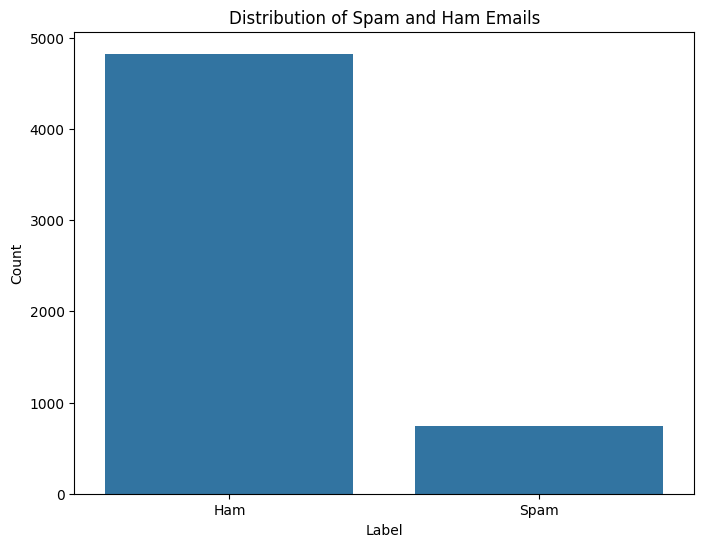

In [4]:
# Plot the distribution of spam and ham emails
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=spam_data)
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

# Feature: Length of the email
spam_data['length'] = spam_data['text'].apply(len)

# Feature: Number of special characters
spam_data['num_special_chars'] = spam_data['text'].apply(lambda x: sum([1 for char in x if char in string.punctuation]))

# Feature: Number of digits
spam_data['num_digits'] = spam_data['text'].apply(lambda x: sum([1 for char in x if char.isdigit()]))




In [5]:
# Display the first few rows with new features
print(spam_data.head())


   label                                               text  length  \
0      0  Go until jurong point, crazy.. Available only ...     111   
1      0                      Ok lar... Joking wif u oni...      29   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...     155   
3      0  U dun say so early hor... U c already then say...      49   
4      0  Nah I don't think he goes to usf, he lives aro...      61   

   num_special_chars  num_digits  
0                  9           0  
1                  6           0  
2                  6          25  
3                  6           0  
4                  2           0  


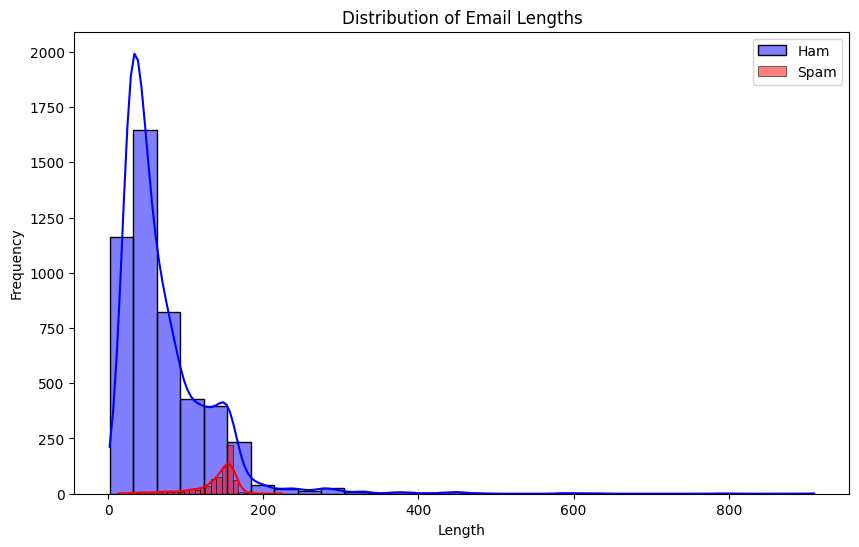

In [6]:
# Plot the distribution of email lengths
plt.figure(figsize=(10, 6))
sns.histplot(spam_data[spam_data['label'] == 0]['length'], bins=30, color='blue', label='Ham', kde=True)
sns.histplot(spam_data[spam_data['label'] == 1]['length'], bins=30, color='red', label='Spam', kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()



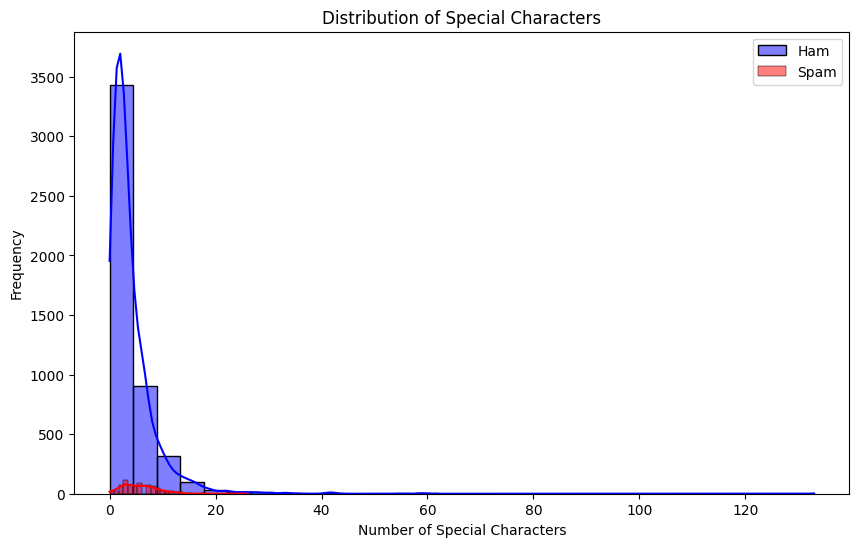

In [7]:
# Plot the distribution of special characters
plt.figure(figsize=(10, 6))
sns.histplot(spam_data[spam_data['label'] == 0]['num_special_chars'], bins=30, color='blue', label='Ham', kde=True)
sns.histplot(spam_data[spam_data['label'] == 1]['num_special_chars'], bins=30, color='red', label='Spam', kde=True)
plt.title('Distribution of Special Characters')
plt.xlabel('Number of Special Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()


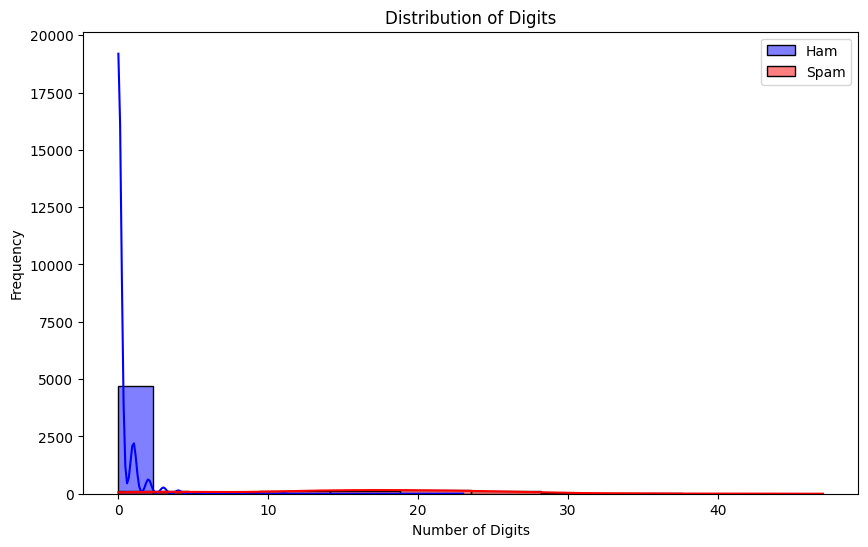

In [8]:
# Plot the distribution of digits
plt.figure(figsize=(10, 6))
sns.histplot(spam_data[spam_data['label'] == 0]['num_digits'], bins=10, color='blue', label='Ham', kde=True)
sns.histplot(spam_data[spam_data['label'] == 1]['num_digits'], bins=10, color='red', label='Spam', kde=True)
plt.title('Distribution of Digits')
plt.xlabel('Number of Digits')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [16]:
# Combine text features with new numerical features
class CombinedFeatures:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    
    def fit_transform(self, X, y=None):
        text_features = self.vectorizer.fit_transform(X['text'])
        length_features = X['length'].values[:, None]
        special_char_features = X['num_special_chars'].values[:, None]
        num_digits_features = X['num_digits'].values[:, None]
        return np.hstack((text_features.toarray(), length_features, special_char_features, num_digits_features))
    
    def transform(self, X):
        text_features = self.vectorizer.transform(X['text'])
        length_features = X['length'].values[:, None]
        special_char_features = X['num_special_chars'].values[:, None]
        num_digits_features = X['num_digits'].values[:, None]
        return np.hstack((text_features.toarray(), length_features, special_char_features, num_digits_features))

# Prepare data
X = spam_data[['text', 'length', 'num_special_chars']]
y = spam_data['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Feature: Number of digits in the email text
def count_digits(text):
    return sum(char.isdigit() for char in text)

# Add 'num_digits' feature to your data
X_train['num_digits'] = X_train['text'].apply(count_digits)
X_test['num_digits'] = X_test['text'].apply(count_digits)

# Initialize CombinedFeatures and continue with your existing code



In [18]:
# Initialize CombinedFeatures and Naive Bayes model
combined_features = CombinedFeatures()
X_train_combined = combined_features.fit_transform(X_train)
X_test_combined = combined_features.transform(X_test)

model = MultinomialNB()
model.fit(X_train_combined, y_train)




MultinomialNB()

In [19]:
# Make predictions
y_pred = model.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



Accuracy: 0.9730941704035875
Precision: 0.9166666666666666
Recall: 0.88
F1 Score: 0.8979591836734694


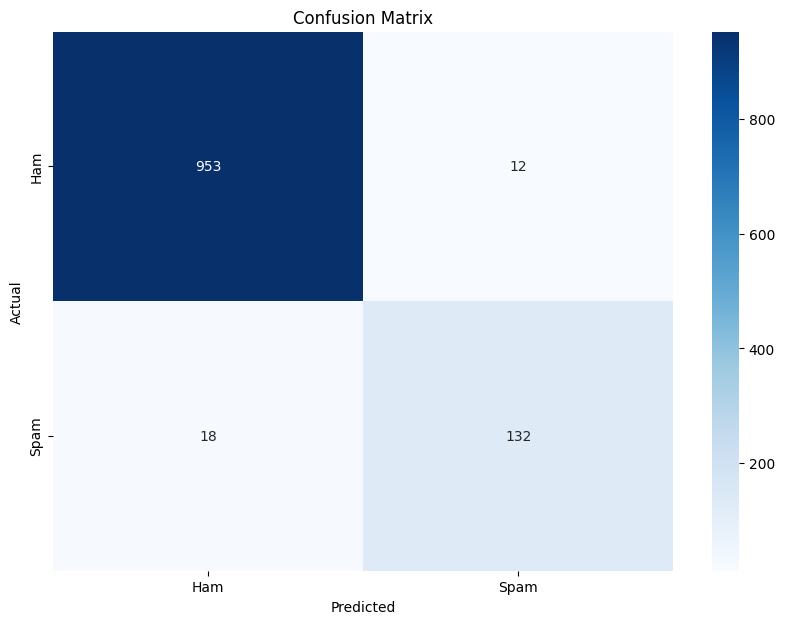

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Function to predict whether an email is spam or not
def predict_email(text):
    length = len(text)
    num_special_chars = sum([1 for char in text if char in string.punctuation])
    text_transformed = combined_features.vectorizer.transform([text])
    combined_transformed = np.hstack((text_transformed.toarray(), [[length]], [[num_special_chars]]))
    prediction = model.predict(combined_transformed)
    return 'Spam' if prediction[0] == 1 else 'Ham'



In [25]:
class CombinedFeatures:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    
    def fit_transform(self, X, y=None):
        text_features = self.vectorizer.fit_transform(X['text'])
        length_features = X['length'].values[:, None]
        special_char_features = X['num_special_chars'].values[:, None]
        return np.hstack((text_features.toarray(), length_features, special_char_features))
    
    def transform(self, X):
        text_features = self.vectorizer.transform(X['text'])
        length_features = X['length'].values[:, None]
        special_char_features = X['num_special_chars'].values[:, None]
        return np.hstack((text_features.toarray(), length_features, special_char_features))

# Ensure prediction function uses the same instance of CombinedFeatures
combined_features = CombinedFeatures()

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import string



In [34]:
# Sample data for illustration
data = {
    'text': ["Hello, how are you?", "WINNER! You've won a prize!", "Meeting at 10am tomorrow"],
    'label': [0, 1, 0]
}
df = pd.DataFrame(data)



In [35]:
# CombinedFeatures class to handle text and numerical features
class CombinedFeatures:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    
    def fit_transform(self, X, y=None):
        # Fit the vectorizer on training data
        text_features = self.vectorizer.fit_transform(X['text'])
        length_features = X['text'].apply(len).values[:, None]
        special_char_features = X['text'].apply(lambda x: sum([1 for char in x if char in string.punctuation])).values[:, None]
        return np.hstack((text_features.toarray(), length_features, special_char_features))
    
    def transform(self, X):
        # Transform using the fitted vectorizer
        text_features = self.vectorizer.transform(X['text'])
        length_features = X['text'].apply(len).values[:, None]
        special_char_features = X['text'].apply(lambda x: sum([1 for char in x if char in string.punctuation])).values[:, None]
        return np.hstack((text_features.toarray(), length_features, special_char_features))



In [36]:
# Example function to predict email classification
def predict_email(text, combined_features, model):
    # Transform text into combined features
    length = len(text)
    num_special_chars = sum([1 for char in text if char in string.punctuation])
    text_transformed = combined_features.vectorizer.transform([text])
    combined_transformed = np.hstack((text_transformed.toarray(), [[length]], [[num_special_chars]]))
    
    # Predict using the model
    prediction = model.predict(combined_transformed)
    return 'Spam' if prediction[0] == 1 else 'Ham'




In [37]:
# Prepare data
X = df[['text']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize CombinedFeatures and Naive Bayes model
combined_features = CombinedFeatures()
X_train_combined = combined_features.fit_transform(X_train)
model = MultinomialNB()
model.fit(X_train_combined, y_train)

# Example usage in a loop
while True:
    user_input = input("Enter an email text to classify (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    
    # Ensure the vectorizer is fitted before prediction
    combined_features.fit_transform(X_train)
    print(f'Prediction: {predict_email(user_input, combined_features, model)}')
    print('---')

Enter an email text to classify (or 'exit' to quit): Hello, how are you?
Prediction: Spam
---
Enter an email text to classify (or 'exit' to quit): WINNER! You've won a prize!
Prediction: Spam
---
Enter an email text to classify (or 'exit' to quit): Meeting at 10am tomorrow
Prediction: Ham
---
